### Exercise 0

Rachel Lim (002321261)

2024-09-12

Discussed with: Arjun Viswanathan	


In [41]:
import random
import numpy as np
import tqdm.notebook as tqdm
import matplotlib.pyplot as plt
import ipywidgets as widgets
from tqdm import tqdm

In [52]:
# FOUR ROOM ENVIRONMENT
class FourRooms(object):
    def __init__(self):
        # define the four room as a 2-D array for easy state space reference and visualization
        # 0 represents an empty cell; 1 represents a wall cell
        self.four_room_space = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
        
        # find the positions for all empty cells
        # not that: the origin for a 2-D numpy array is located at top-left while the origin for the FourRooms is at
        # the bottom-left. The following codes performs the re-projection.
        empty_cells = np.where(self.four_room_space == 0.0)
        self.state_space = [[col, 10 - row] for row, col in zip(empty_cells[0], empty_cells[1])]

        # define the action space
        self.action_space = {'LEFT': np.array([-1, 0]),
                             'RIGHT': np.array([1, 0]),
                             'DOWN': np.array([0, -1]),
                             'UP': np.array([0, 1])}
        
        # define the start state
        self.start_state = [0, 0]
        
        # define the goal state
        self.goal_state = [10, 10]
        

    def reset(self):
        """
        Reset the agent's state to the start state [0, 0]
        Return both the start state and reward
        """
        state = self.start_state  # reset the agent to [0, 0]
        reward = 0  # reward is 0
        return state, reward
        

    def step(self, state, act):
        """
        Args: 
            state: a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act: a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state: a list variable containing x, y integer coordinates (i.e., [1, 1])
            reward: an integer. it can be either 0 or 1.
        """
        
        # CODE HERE: implement the stochastic dynamics as described in Q1. 
        # Please note, we provide you with the deterministic transition function "take_action" below.
        # Therefore, you only have to implement the logics of the stochasticity.

        # list of possible actions, ordered
        possible_actions = ["UP", "RIGHT", "DOWN", "LEFT"]
        act_index = possible_actions.index(act) # index of requested action

        # add stochasticity 
        random_num = random.random()
        # 80% chance of doing requested action
        if random_num < 0.8:
          action = act
        # 10% chance of going perpendiculally to the left
        # mod 4 to wrap around list of possible actions
        elif random_num < 0.9:
          action = possible_actions[(act_index+1)%4]
        # 10% chance of going perpendiculally to the right
        else:
          action = possible_actions[act_index-1]

        next_state = self.take_action(state, action)

        # CODE HERE: compute the reward based on the resulting state
        reward = (next_state == self.goal_state)

        # return the current state, reward
        return next_state, reward
        

    """ DO NOT CHANGE BELOW """
    def take_action(self, state, act):
        """
        Input args: 
            state (list): a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act (string): a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state (list): a list variable containing x, y integer coordinates (i.e., [1, 1])
        """
        state = np.array(state)
        next_state = state + self.action_space[act]
        return next_state.tolist() if next_state.tolist() in self.state_space else state.tolist()

In [43]:
"""Here is the plot function you can use to generate the figure. DO NOT CHANGE"""
# PLOT FUNCTION
def plot_func(res_list):
    # set the figure size
    plt.figure(figsize=(8, 6))
    
    # plot each trial
    for re in res_list:
        plt.plot(list(range(len(res_list[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_reward = np.array(res_list).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list[0]))), mean_reward, linestyle="-", linewidth=2, color="k")

    # plot the figure
    plt.ylabel("Cumulative reward")
    plt.xlabel("Time step")
    plt.show()

# 2 Implement the manual policy

In [44]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)

    # create the environment
    env = FourRooms()
    state, reward = env.reset()  # always call reset() before interaction
    
    # manual time step (YOU CAN CHANGE THIS TO ANY TIME STEP YOU WANT)
    time_step = 100

    # create a loop
    for t in range(time_step):
        
        # CODE HERE: implement your manual agent/policy function that takes in the action from the standard input
        action = input("Enter action here")
        
        # add way to break loop before time_step finishes
        if action == "END":
            break
        
        # CODE HERE: implement the code to interact with the Four Rooms environment above.
        # it should takes in the current state and action and returns the next_state and a reward
        # Hint: use the step function that you implement.
        next_state, reward = env.step(state, action)
        
        """DO NOT CHANGE BELOW"""
        # print interaction
        print(f"Step = {t}, state = {state}, action = {action}, next state = {next_state}, reward = {reward}")
        
        # reset if the agent reaches the goal
        if reward == 1:
            print("Reset the agent to the start state!")
            state, reward = env.reset()
        else:
            state = next_state

Enter action here UP


Step = 0, state = [0, 0], action = UP, next state = [0, 0], reward = False


Enter action here UP


Step = 1, state = [0, 0], action = UP, next state = [0, 1], reward = False


Enter action here UP


Step = 2, state = [0, 1], action = UP, next state = [0, 2], reward = False


Enter action here UP


Step = 3, state = [0, 2], action = UP, next state = [0, 2], reward = False


Enter action here UP


Step = 4, state = [0, 2], action = UP, next state = [0, 2], reward = False


Enter action here UP


Step = 5, state = [0, 2], action = UP, next state = [0, 3], reward = False


Enter action here UP


Step = 6, state = [0, 3], action = UP, next state = [0, 4], reward = False


Enter action here RIGHT


Step = 7, state = [0, 4], action = RIGHT, next state = [1, 4], reward = False


Enter action here UP


Step = 8, state = [1, 4], action = UP, next state = [1, 5], reward = False


Enter action here UP


Step = 9, state = [1, 5], action = UP, next state = [1, 6], reward = False


Enter action here UP


Step = 10, state = [1, 6], action = UP, next state = [1, 7], reward = False


Enter action here UP


Step = 11, state = [1, 7], action = UP, next state = [1, 8], reward = False


Enter action here RIGHT


Step = 12, state = [1, 8], action = RIGHT, next state = [2, 8], reward = False


Enter action here RIGHT


Step = 13, state = [2, 8], action = RIGHT, next state = [3, 8], reward = False


Enter action here RIGHT


Step = 14, state = [3, 8], action = RIGHT, next state = [4, 8], reward = False


Enter action here RIGHT


Step = 15, state = [4, 8], action = RIGHT, next state = [5, 8], reward = False


Enter action here RIGHT


Step = 16, state = [5, 8], action = RIGHT, next state = [6, 8], reward = False


Enter action here RIGHT


Step = 17, state = [6, 8], action = RIGHT, next state = [7, 8], reward = False


Enter action here RIGHT


Step = 18, state = [7, 8], action = RIGHT, next state = [8, 8], reward = False


Enter action here RIGHT


Step = 19, state = [8, 8], action = RIGHT, next state = [9, 8], reward = False


Enter action here RIGHT


Step = 20, state = [9, 8], action = RIGHT, next state = [9, 9], reward = False


Enter action here RIGHT


Step = 21, state = [9, 9], action = RIGHT, next state = [10, 9], reward = False


Enter action here UP


Step = 22, state = [10, 9], action = UP, next state = [10, 10], reward = True
Reset the agent to the start state!


Enter action here END


# 3 Implement a random policy

Episode:   0%|                                               | 0/10000 [00:00<?, ?it/s]
                                                                                       
Episode:   0%|                                               | 0/10000 [00:00<?, ?it/s]
                                                                                       
Episode:  96%|███████████████████████████████▌ | 9569/10000 [00:00<00:00, 95685.07it/s]
                                                                                       
Episode:   0%|                                               | 0/10000 [00:00<?, ?it/s]
                                                                                       
Episode:   0%|                                               | 0/10000 [00:00<?, ?it/s]
                                                                                       
Run trial: 100%|███████████████████████████████████████| 10/10 [00:00<00:00, 10.46it/s]


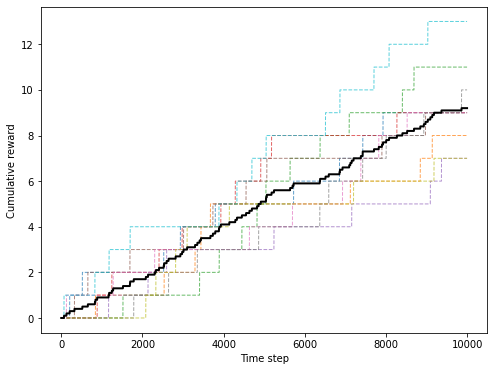

In [50]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_num = 10   
    # length of each trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list = []
    
    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: please implement a random policy to obtain an action.
            # it should return a random action from ["UP", "DOWN", "LEFT", "RIGHT"]

            # pick random directions from available options (keys of action_space)
            action = random.choice([*env.action_space])
                       
            # CODE HERE: please implement the code to get the next state and reward
            # it should takes in the current state and action
            # it should returns the next_state and reward
            next_state, reward = env.step(state, action)
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list)

### Explanation: 
The random policy is slower than the manual policy if executed optimally. With the manual policy, the user is aware of the map including current location, goal, and walls and can always choose the greedy policy. The user is also aware of the results of noise and can immediately react. The random policy has only a 25%-50% chance of choosing the optimal direction (25% chance if there is one optimal direction, 50% chance if there are 2 optimal directions i.e. goal is to move diagonally) while with the manual policy, the user can always choose the optimal direction.

# 4 Implement better & worse policies against the Random Policy

Run trial: 100%|███████████████████████████████████████| 10/10 [00:01<00:00,  7.88it/s]


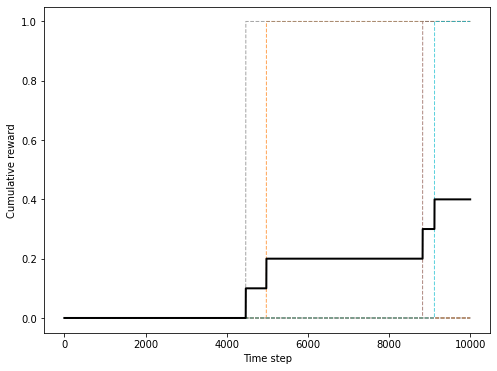

In [49]:
### IMPLEMENT WORSE POLICY

if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail
    trial_num = 10   
    # length of each trail
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list_worse = []
    
    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: please implement a policy that is worse than the random policy.
            # It should takes in the current state and output an action

            # weight actions towards "DOWN" which is almost never the optimal direction
            action = random.choice([*env.action_space] + ["DOWN"])
                       
            # CODE HERE: please implement the code to get the next state and reward
            next_state, reward = env.step(state, action)
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list_worse.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list_worse)

Episode:   0%|                                               | 0/10000 [00:00<?, ?it/s]
                                                                                       
Episode:   0%|                                               | 0/10000 [00:00<?, ?it/s]
                                                                                       
Episode:   0%|                                               | 0/10000 [00:00<?, ?it/s]
                                                                                       
Episode:   0%|                                               | 0/10000 [00:00<?, ?it/s]
                                                                                       
Episode:  94%|██████████████████████████████▊  | 9356/10000 [00:00<00:00, 93545.59it/s]
                                                                                       
Run trial: 100%|███████████████████████████████████████| 10/10 [00:00<00:00, 10.25it/s]


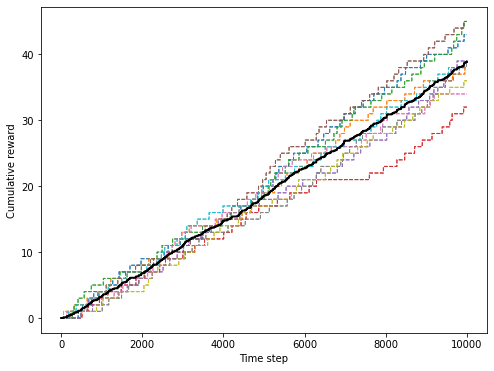

In [48]:
### IMPLEMENT BETTER POLICY
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail
    trial_num = 10   
    # length of each trail
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list = []
    
    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: please implement a policy that is worse than the random policy.
            # It should takes in the current state and output an action

            # weight actions towards "UP" and "RIGHT" which are almost always the optimal directions
            action = random.choice([*env.action_space] + ["UP", "RIGHT"])
                       
            # CODE HERE: please implement the code to get the next state and reward
            next_state, reward = env.step(state, action)
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list_better.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list_better)

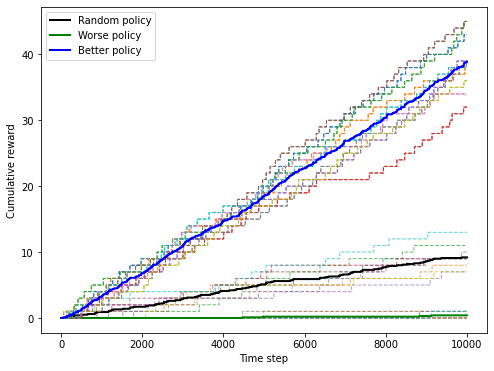

In [51]:
### PLOT ALL POLICIES AGAINST EACH OTHER

# set the figure size
plt.figure(figsize=(8, 6))

for res_list, color, label in [[rewards_list, 'k', "Random policy"], 
                               [rewards_list_worse, 'g', "Worse policy"], 
                               [rewards_list_better, 'b', "Better policy"]]:
    
    # plot each trial
    for re in res_list:
        plt.plot(list(range(len(res_list[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_reward = np.array(res_list).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list[0]))), mean_reward, linestyle="-", linewidth=2, color=color, label=label)

# plot the figure
plt.ylabel("Cumulative reward")
plt.xlabel("Time step")
plt.legend()
plt.show()

### Explanation:

"Random policy" is the baseline, where there is an equal chance of choosing between "UP", "DOWN", "LEFT", and "RIGHT".

"Worse policy" makes it twice as likely to choose "DOWN" over the other directions. Since that is almost never the optimal direction, this produces worse results. 

"Better policy" makes it twice as likely to choose "UP" or "RIGHT" over "DOWN" or "LEFT (equally likely to choose "UP" as "RIGHT"). SInce these are almost always the optimal directions, as the goal location is diagonally up and right from the start location, this produces better results.